In [1]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
from datetime import datetime
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]

In [2]:
all = pd.read_csv("data/labstar_tableau.csv")

In [3]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10637773 entries, 0 to 10637772
Data columns (total 44 columns):
lab_name                       object
subscriber_id                  int64
subscriber_name                object
subscriber_plan_id             int64
nb_subscriber_features         int64
subscriber_last_updated        object
subscriber_plan_name           object
case_id                        int64
case_state                     float64
case_created_on                object
case_client_estimated_price    float64
case_nb_other_products         float64
client_id                      float64
client_name                    object
shipping_city                  object
shipping_state                 object
shipping_zipcode               object
shipping_country_name          object
shipping_country_code          object
billing_city                   object
billing_state                  object
billing_zipcode                object
billing_country_name           object
billing_cou

In [4]:
all.isnull().sum()

lab_name                              0
subscriber_id                         0
subscriber_name                       0
subscriber_plan_id                    0
nb_subscriber_features                0
subscriber_last_updated               0
subscriber_plan_name                  0
case_id                               0
case_state                          142
case_created_on                       0
case_client_estimated_price         727
case_nb_other_products         10128792
client_id                            35
client_name                          64
shipping_city                      3336
shipping_state                  1417618
shipping_zipcode                1048347
shipping_country_name             36280
shipping_country_code             36380
billing_city                     906221
billing_state                   2132065
billing_zipcode                 1794227
billing_country_name             233045
billing_country_code             233145
unit_id                           52425


In [6]:
all_reduced = all[['lab_name', 'case_id', 'unit_id', 'case_created_on']]

In [17]:
all_reduced.drop_duplicates(keep='first', inplace=True)

In [18]:
all_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9467199 entries, 0 to 10637772
Data columns (total 5 columns):
lab_name           object
case_id            int64
unit_id            float64
case_created_on    datetime64[ns]
month              object
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 433.4+ MB


In [24]:
all_reduced.isnull().sum()

lab_name               0
case_id                0
unit_id            52425
case_created_on        0
month                  0
day                    0
dtype: int64

In [12]:
# Transform dtype where appropriate
all_reduced['case_created_on'] = pd.to_datetime(all_reduced['case_created_on'])
#all_reduced['billing_item_created_on'] = pd.to_datetime(all_reduced['billing_item_created_on'])

In [16]:
# Create column 'month'
#all_reduced['month'] = all_reduced['case_created_on'].apply(lambda x: x.strftime('%Y-%m'))
all_reduced[['case_created_on', 'month']].head()

,case_created_on,month
0,2017-06-28 18:48:08.793,2017-06
1,2017-06-28 18:48:08.793,2017-06
2,2017-06-28 18:48:08.793,2017-06
3,2017-06-29 12:43:38.153,2017-06
4,2017-06-29 12:43:38.153,2017-06


In [19]:
# Create column 'day'
all_reduced['day'] = all_reduced['case_created_on'].apply(lambda x: x.strftime('%Y-%m-%d'))
all_reduced[['case_created_on', 'day']].head()

,case_created_on,day
0,2017-06-28 18:48:08.793,2017-06-28
1,2017-06-28 18:48:08.793,2017-06-28
2,2017-06-28 18:48:08.793,2017-06-28
3,2017-06-29 12:43:38.153,2017-06-29
4,2017-06-29 12:43:38.153,2017-06-29


In [22]:
all_reduced.month.unique()

array(['2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11',
       '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05',
       '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11',
       '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05',
       '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03',
       '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09',
       '2014-10', '2014-11', '2014-12', '2015-01', '2015-07', '2015-02',
       '2015-03', '2015-09', '2015-05', '2015-04', '2015-06', '2015-10',
       '2015-08', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03',
       '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09',
       '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03',
       '2017-04', '2017-05', '2012-08', '2012-07', '2012-09', '2012-10',
       '2012-11', '2012-12', '2012-01', '2013-01', '2013-02', '2013-03',
       '2013-04', '2013-05', '2013-06', '2013-07', 

In [23]:
# Save to csv
all_reduced.to_csv('data/labstar_time_series_analysis_all_for_presentation.csv', index=False, header=True)

# Perform time-series analysis on all cases and all units

In [ ]:
# Load the data
all_reduced = pd.read_csv("data/labstar_time_series_analysis_all_reduced.csv")

In [29]:
data = all_reduced
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9414774 entries, 0 to 10637772
Data columns (total 6 columns):
lab_name           object
case_id            int64
unit_id            int64
case_created_on    datetime64[ns]
month              object
day                object
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 502.8+ MB


In [52]:
data.drop_duplicates(keep='first', inplace=True)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9414774 entries, 0 to 10637772
Data columns (total 6 columns):
lab_name           object
case_id            int64
unit_id            int64
case_created_on    datetime64[ns]
month              object
day                object
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 502.8+ MB


In [54]:
data.isnull().sum()

lab_name           0
case_id            0
unit_id            0
case_created_on    0
month              0
day                0
dtype: int64

In [28]:
# Drop rows with no unit_id
data.dropna(subset=['unit_id'], inplace=True)
data['unit_id'] = data['unit_id'].astype(np.int64)

In [55]:
# Group by 'lab_name', 'month', 'day', 'case_id'
g_by_cases = data.groupby(by=['lab_name', 'month', 'day', 'case_id'], as_index=False)
data_by_cases = g_by_cases.agg({'unit_id': 'count'})
data_by_cases.rename(columns={'unit_id': 'nb_units'}, inplace=True)
data_by_cases.head()

,lab_name,month,day,case_id,nb_units
0,3DDENTALLABORATORIES,2017-06,2017-06-28,5,3
1,3DDENTALLABORATORIES,2017-06,2017-06-29,7,3
2,3DDENTALLABORATORIES,2017-06,2017-06-29,8,1
3,3DDENTALLABORATORIES,2017-06,2017-06-30,9,3
4,3DDENTALLABORATORIES,2017-06,2017-06-30,11,1


In [56]:
data_by_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5904296 entries, 0 to 5904295
Data columns (total 5 columns):
lab_name    object
month       object
day         object
case_id     int64
nb_units    int64
dtypes: int64(2), object(3)
memory usage: 270.3+ MB


In [57]:
data_by_cases.describe()

,case_id,nb_units
count,5.904296e+06,5.904296e+06
mean,2.356408e+04,1.594563e+00
std,2.717662e+04,1.809069e+00
min,1.000000e+00,1.000000e+00
25%,5.017000e+03,1.000000e+00
50%,1.365400e+04,1.000000e+00
75%,3.231100e+04,1.000000e+00
max,1.708730e+05,9.600000e+01


In [58]:
# Group by 'lab_name', 'month', 'day'
g_by_day = data_by_cases.groupby(by=['lab_name', 'month', 'day'], as_index=False)
data_daily = g_by_day.agg({'case_id': 'count', 'nb_units': 'sum'})
data_daily.rename(columns={'case_id': 'nb_cases'}, inplace=True)
data_daily.head()

,lab_name,month,day,nb_cases,nb_units
0,3DDENTALLABORATORIES,2017-06,2017-06-28,1,3
1,3DDENTALLABORATORIES,2017-06,2017-06-29,2,4
2,3DDENTALLABORATORIES,2017-06,2017-06-30,12,17
3,3DDENTALLABORATORIES,2017-07,2017-07-03,8,9
4,3DDENTALLABORATORIES,2017-07,2017-07-05,4,4


In [64]:
data_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289002 entries, 0 to 289001
Data columns (total 4 columns):
lab_name    289002 non-null object
day         289002 non-null object
nb_cases    289002 non-null int64
nb_units    289002 non-null int64
dtypes: int64(2), object(2)
memory usage: 11.0+ MB


In [60]:
data_daily.describe()

,nb_cases,nb_units
count,289002.000000,289002.000000
mean,20.429949,32.576847
std,26.869866,42.485713
min,1.000000,1.000000
25%,5.000000,7.000000
50%,12.000000,18.000000
75%,26.000000,41.000000
max,512.000000,639.000000


In [61]:
data_daily.drop('month', axis=1, inplace=True)

In [62]:
data_daily.drop_duplicates(keep='first', inplace=True)

In [65]:
#data_daily.reset_index(inplace=True)
data_daily.rename(columns={'index': 'id'}, inplace=True)
data_daily.head()

,lab_name,day,nb_cases,nb_units
0,3DDENTALLABORATORIES,2017-06-28,1,3
1,3DDENTALLABORATORIES,2017-06-29,2,4
2,3DDENTALLABORATORIES,2017-06-30,12,17
3,3DDENTALLABORATORIES,2017-07-03,8,9
4,3DDENTALLABORATORIES,2017-07-05,4,4


In [50]:
data_daily['day'] = pd.to_datetime(data_daily['day'])
data_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289002 entries, 0 to 289001
Data columns (total 5 columns):
id          289002 non-null int64
lab_name    289002 non-null object
day         289002 non-null datetime64[ns]
nb_cases    289002 non-null int64
nb_units    289002 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 11.0+ MB


In [66]:
data_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289002 entries, 0 to 289001
Data columns (total 4 columns):
lab_name    289002 non-null object
day         289002 non-null object
nb_cases    289002 non-null int64
nb_units    289002 non-null int64
dtypes: int64(2), object(2)
memory usage: 11.0+ MB


In [48]:
# Save to csv
data_daily.to_csv('data/data_time_series_analysis_forecasting_daily.csv', index=False, header=True)


# Anonymize lab_name

In [16]:
# Load data
df = pd.read_csv('data/data_time_series_analysis_forecasting_daily.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289002 entries, 0 to 289001
Data columns (total 5 columns):
id          289002 non-null int64
lab_name    289002 non-null object
day         289002 non-null object
nb_cases    289002 non-null int64
nb_units    289002 non-null int64
dtypes: int64(3), object(2)
memory usage: 11.0+ MB


In [11]:
lab_names = df['lab_name'].unique()
lab_names

array(['3DDENTALLABORATORIES', '3DENTAL', '3DLABSMT', '3LLABORATORIES',
       'AAA', 'AADENTALDESIGN', 'ADARDN', 'ADC', 'ADI', 'ADL', 'ADVANCED',
       'ADVANCEDDENTALLAB', 'AESTHETIC', 'AESTHETICSOLUTIONS', 'AFX',
       'AIRWAYCENTRICORTHOTICS', 'ALCADENT', 'ALLGOOD', 'ALOHADENTALLAB',
       'ANTEK', 'APEXDENTAL', 'APEXDENTALMILLING_1', 'APEXLABORATOIRE',
       'APLUSDENTALLAB_1', 'ARCHFORM', 'ARCHWORKS', 'ARDDENTTEC', 'ARIA',
       'ARIZONADENTURESPLUS', 'ARLABS', 'ARROWLIGN', 'ARTDENTAL',
       'ARTDENTALLAB', 'ARTFUNCTIONDENTAL', 'ARTISANDENTAL', 'ARTISAN_1',
       'ARTISTIC', 'AUTUMNDENTALLAB', 'AVANEER', 'AVESTADENTALARTS',
       'AZZTECH', 'BALLARDDENTALLAB', 'BALLARDDENTALLABKY', 'BARAN',
       'BAYCROWN', 'BAYTOBAY', 'BDADENTALSTUDIO_1',
       'BELLAVITADENTALDESIGNS', 'BESTVALUEDENTALDESIGNS',
       'BLUEBOXDENTAL', 'BLUECHOICELABS', 'BLU_DENTAL_LAB', 'BOGEN',
       'BOSKLAB', 'BOTANYDENTALLAB', 'BRIANTRACEY', 'BRIGHTONDENTALLAB',
       'BROADWAYDENTALLAB', 'BRO

In [12]:
import random
new_names = []
for name in lab_names:
    anonym = name[0]+str(len(name))+name[-1]+'-'+name[1]+str(random.randint(100,999))
    new_names.append(anonym)
new_names

['320S-D718',
 '37L-D851',
 '38T-D685',
 '314S-L496',
 'A3A-A290',
 'A14N-A872',
 'A6N-D165',
 'A3C-D627',
 'A3I-D361',
 'A3L-D231',
 'A8D-D759',
 'A17B-D669',
 'A9C-E598',
 'A18S-E589',
 'A3X-F781',
 'A22S-I398',
 'A8T-L955',
 'A7D-L212',
 'A14B-L309',
 'A5K-N865',
 'A10L-P190',
 'A191-P932',
 'A15E-P776',
 'A161-P327',
 'A8M-R829',
 'A9S-R112',
 'A10C-R212',
 'A4A-R887',
 'A19S-R507',
 'A6S-R607',
 'A9N-R657',
 'A9L-R155',
 'A12B-R825',
 'A17L-R358',
 'A13L-R522',
 'A91-R539',
 'A8C-R813',
 'A15B-U966',
 'A7R-V127',
 'A16S-V493',
 'A7H-Z556',
 'B16B-A844',
 'B18Y-A773',
 'B5N-A879',
 'B8N-A695',
 'B8Y-A863',
 'B171-D280',
 'B22S-E914',
 'B22S-E359',
 'B13L-L767',
 'B14S-L403',
 'B14B-L498',
 'B5N-O911',
 'B7B-O136',
 'B15B-O604',
 'B11Y-R264',
 'B17B-R206',
 'B17B-R595',
 'B17B-R283',
 'B11N-R160',
 'B15B-U917',
 'B4L-V430',
 'B8N-Y647',
 'C16S-A346',
 'C14S-A914',
 'C10G-A962',
 'C11L-A707',
 'C17S-A498',
 'C7L-A418',
 'C3B-C337',
 'C3I-D918',
 'C10E-D970',
 'C6T-E933',
 'C8L-E333',

In [13]:
code_names = pd.DataFrame()
code_names['lab_name'] = lab_names
code_names['new_name'] = new_names
code_names.head()

,lab_name,new_name
0,3DDENTALLABORATORIES,320S-D718
1,3DENTAL,37L-D851
2,3DLABSMT,38T-D685
3,3LLABORATORIES,314S-L496
4,AAA,A3A-A290


In [14]:
code_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 2 columns):
lab_name    471 non-null object
new_name    471 non-null object
dtypes: object(2)
memory usage: 7.4+ KB


In [15]:
# Save to csv
code_names.to_csv('data/code_names.csv', index=False, header=True)

In [17]:
df = pd.merge(df, code_names, how='left', on=['lab_name'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289002 entries, 0 to 289001
Data columns (total 6 columns):
id          289002 non-null int64
lab_name    289002 non-null object
day         289002 non-null object
nb_cases    289002 non-null int64
nb_units    289002 non-null int64
new_name    289002 non-null object
dtypes: int64(3), object(3)
memory usage: 15.4+ MB


In [18]:
df.drop(['id', 'lab_name'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289002 entries, 0 to 289001
Data columns (total 4 columns):
day         289002 non-null object
nb_cases    289002 non-null int64
nb_units    289002 non-null int64
new_name    289002 non-null object
dtypes: int64(2), object(2)
memory usage: 11.0+ MB


In [19]:
df.rename(columns={'new_name': 'lab_name'}, inplace=True)
df = df[['lab_name', 'day', 'nb_cases', 'nb_units']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289002 entries, 0 to 289001
Data columns (total 4 columns):
lab_name    289002 non-null object
day         289002 non-null object
nb_cases    289002 non-null int64
nb_units    289002 non-null int64
dtypes: int64(2), object(2)
memory usage: 11.0+ MB


In [20]:
# Save to csv
df.to_csv('data/data_time_series_analysis_forecasting_daily.csv', index=False, header=True)

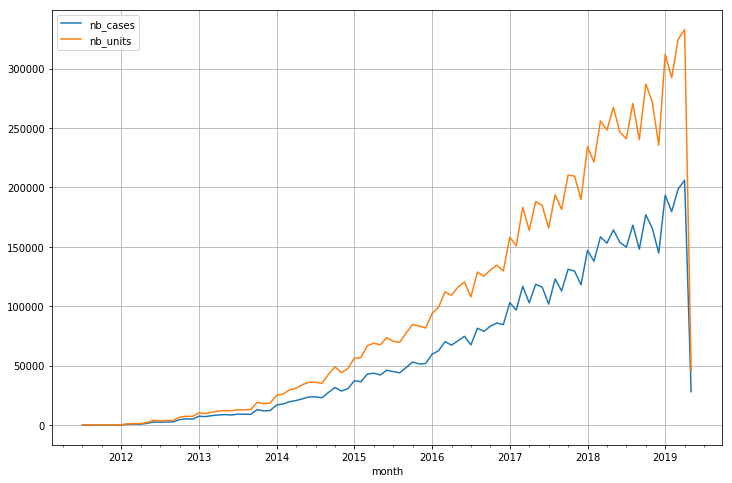

In [83]:
month_groups.plot(grid=True)

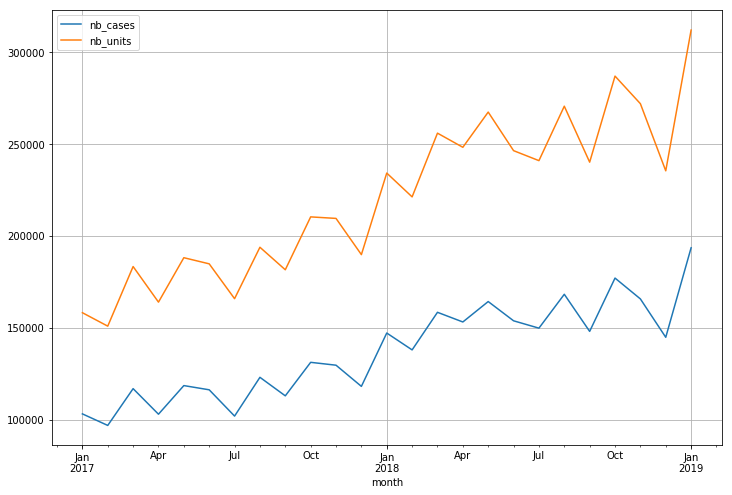

In [84]:
'''We notice an upward trend indicating that LabStar is getting more cases over time.
Although there are ups and downs at every point in time, generally we can observe that the trend increases.
Also we can notice how the ups and downs seem to be a bit regular, indicating that we might be observing a 
seasonal pattern here too.
We can look more closely at a subset of the data.'''
start_date = datetime(2017, 1, 1)
end_date = datetime(2019, 1, 1)
month_groups_17on = month_groups[(start_date <= month_groups.index) & (month_groups.index <= end_date)]
month_groups_17on.plot(grid=True)

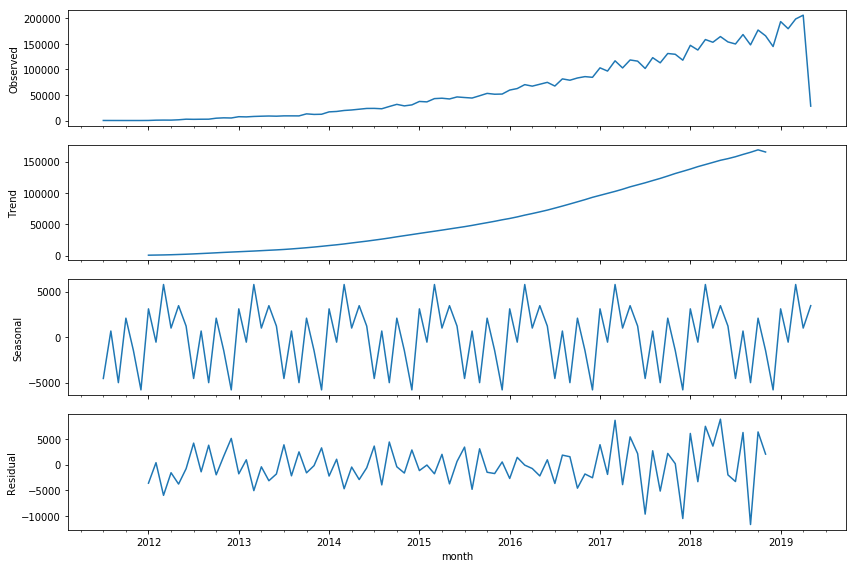

In [85]:
# Use time-series analysis package from statsmodel module to decompose our time series (using the additive model)
'''Additive Model: This model is used when the variations around the trend does not vary with the level of the time
series. Here the components of a time series are simply added together using the formula: 
y(t) = Level(t) + Trend(t) + Seasonality(t) + Noise(t)'''
decomposition_cases = sm.tsa.seasonal_decompose(month_groups['nb_cases'], model = 'additive')
fig_cases = decomposition_cases.plot()
#matplotlib.rcParams['figure.figsize'] = [9.0, 5.0]

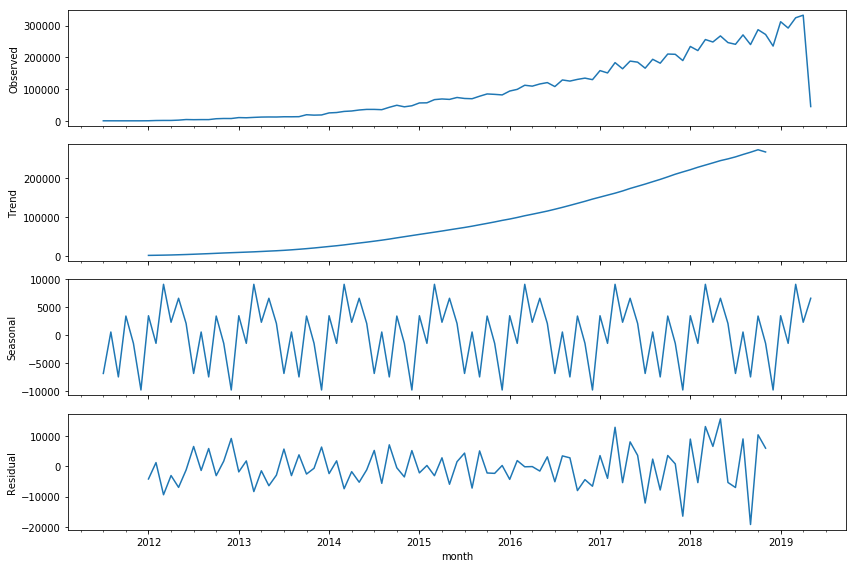

In [86]:
decomposition_units = sm.tsa.seasonal_decompose(month_groups['nb_units'], model = 'additive')
fig_units = decomposition_units.plot()

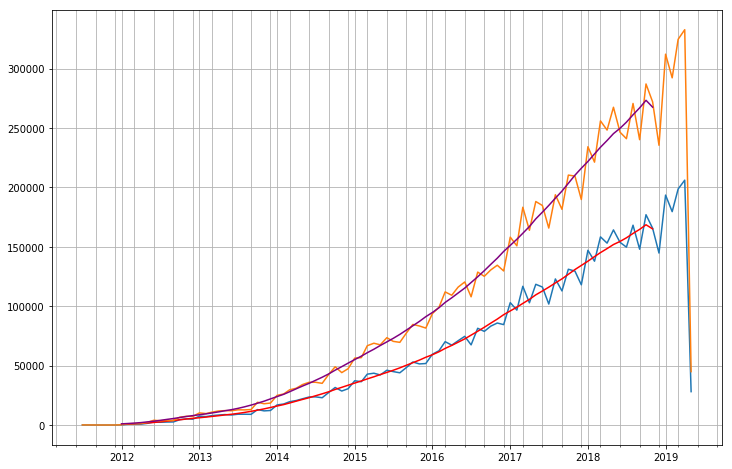

In [87]:
# Plot the trend alongside the observed time series
fig, ax = plt.subplots()
ax.grid(True)
year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=3)
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')
ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)
plt.plot(month_groups.index, month_groups['nb_cases'])
plt.plot(decomposition_cases.trend.index, decomposition_cases.trend, c='red')
plt.plot(month_groups.index, month_groups['nb_units'])
plt.plot(decomposition_units.trend.index, decomposition_units.trend, c='purple')

## Time series forecasting with the SARIMA model

First, we check if the series is stationary using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.
The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary.

In [ ]:
month_groups_17on.head()

In [ ]:
nb_cases = month_groups['nb_cases']
nb_units = month_groups['nb_units']
nb_cases.plot()
nb_units.plot()
plt.show()

In [ ]:
# Zooming on the data since 2017:
nb_cases_17on = month_groups_17on['nb_cases']
nb_units_17on = month_groups_17on['nb_units']
nb_cases_17on.plot()
nb_units_17on.plot()
plt.show()

This may suggest an exponential growth from season to season. A log transform can be used to flatten out exponential change back to a linear relationship.

In [ ]:
X_cases = nb_cases_17on.values
X_units = nb_units_17on.values
X_cases = log(X_cases)
X_units = log(X_units)
plt.plot(X_cases)
plt.plot(X_units)
plt.show()

or not ...
From reviewing the  line plots, we can clearly see that the time series are not stationary.

The Augmented Dickey-Fuller test can provide a quick check and confirmatory evidence that our time series are non-stationary.

The Augmented Dickey-Fuller test is a a unit root type of test. It uses an autoregressive model to determines how strongly a time series is defined by a trend. 

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.
We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result_cases = adfuller(nb_cases.values)
result_units = adfuller(nb_units.values)
print('ADF Statistic for the nb_cases series: %f' % result_cases[0])
print('p-value (nb_cases): %f' % result_cases[1])
print('Critical Values (nb_cases):')
for key, value in result_cases[4].items():
	print('\t%s: %.3f' % (key, value))
print('ADF Statistic for the nb_units series: %f' % result_units[0])
print('p-value (nb_units): %f' % result_units[1])
print('Critical Values (nb_units):')
for key, value in result_units[4].items():
	print('\t%s: %.3f' % (key, value))

The p-values are greater than the significance level: the series are non-stationary. The next step is to find the parameters to configure our SARIMA model

Configuring a SARIMA requires selecting hyperparameters for both the trend and seasonal elements of the series.

There are three trend elements that require configuration.

They are the same as the ARIMA model; specifically:

p: Trend autoregression order.
d: Trend difference order.
q: Trend moving average order.

There are four seasonal elements that are not part of ARIMA that must be configured; they are:

P: Seasonal autoregressive order.
D: Seasonal difference order.
Q: Seasonal moving average order.
m: The number of time steps for a single seasonal period.

Together, the notation for a SARIMA model is specified as: SARIMA(p,d,q)(P,D,Q)m

### Grid-searching SARIMA Hyperparameters for Time Series Forecasting:

In this section, we will develop a framework for grid searching SARIMA model hyperparameters for a given univariate time series forecasting problem.

We will use the implementation of SARIMA provided by the statsmodels library.

This model has hyperparameters that control the nature of the model performed for the series, trend and seasonality, specifically:

- order: A tuple p, d, and q parameters for the modeling of the trend.
- sesonal_order: A tuple of P, D, Q, and m parameters for the modeling the seasonality
- trend: A parameter for controlling a model of the deterministic trend as one of ‘n’,’c’,’t’,’ct’ for no trend, constant, linear, and constant with linear trend, respectively.

If you know enough about your problem to specify one or more of these parameters, then you should specify them. If not, you can try grid searching these parameters.

We can start-off by defining a function that will fit a model with a given configuration and make a one-step forecast.

In [ ]:
# Dependencies
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [ ]:
# One-step sarima forecast
def sarima_forecast(history, config):
    order, sorder, trend = config
    # define model
    model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
    # fit model
    model_fit = model.fit(disp=False)
    # make one step forecast
    yhat = model_fit.predict(len(history), len(history))
    return yhat[0]

Next, we need to build up some functions for fitting and evaluating a model repeatedly via walk-forward validation, including splitting a dataset into train and test sets and evaluating one-step forecasts. The train_test_split() function below implements this for a provided dataset and a specified number of time steps to use in the test set.

In [ ]:
# Split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]

After forecasts have been made for each step in the test dataset, they need to be compared to the test set in order to calculate an error score.

In [ ]:
# Root mean squared error or rmse
def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

We can now implement the walk-forward validation scheme. This is a standard approach to evaluating a time series forecasting model that respects the temporal ordering of observations.

First, a provided univariate time series dataset is split into train and test sets using the train_test_split() function. Then the number of observations in the test set are enumerated. For each we fit a model on all of the history and make a one step forecast. The true observation for the time step is then added to the history and the process is repeated. The sarima_forecast() function is called in order to fit a model and make a prediction. Finally, an error score is calculated by comparing all one-step forecasts to the actual test set by calling the measure_rmse() function.

The walk_forward_validation() function below implements this, taking a univariate time series, a number of time steps to use in the test set, and an array of model configuration.

In [ ]:
# Walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # fit model and make forecast for history
        yhat = sarima_forecast(history, cfg)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
    # estimate prediction error
    error = measure_rmse(test, predictions)
    return error

We can trap exceptions and ignore warnings during the grid search by wrapping all calls to walk_forward_validation() with a try-except and a block to ignore warnings. We can also add debugging support to disable these protections in the case we want to see what is really going on. Finally, if an error does occur, we can return a None result, otherwise we can print some information about the skill of each model evaluated. This is helpful when a large number of models are evaluated.

The score_model() function below implements this and returns a tuple of (key and result), where the key is a string version of the tested model configuration.

In [ ]:
# Score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
    result = None
    # convert config to a key
    key = str(cfg)
    # show all warnings and fail on exception if debugging
    if debug:
        result = walk_forward_validation(data, n_test, cfg)
    else:
        # one failure during model validation suggests an unstable config
        try:
            # never show warnings when grid searching, too noisy
            with catch_warnings():
                filterwarnings("ignore")
                result = walk_forward_validation(data, n_test, cfg)
        except:
            error = None
    # check for an interesting result
    if result is not None:
        print(' > Model[%s] %.3f' % (key, result))
    return (key, result)

Next, we need a loop to test a list of different model configurations.

This is the main function that drives the grid search process and will call the score_model() function for each model configuration.

We can dramatically speed up the grid search process by evaluating model configurations in parallel. One way to do that is to use the Joblib library.

We can define a Parallel object with the number of cores to use and set it to the number of scores detected in your hardware.

The grid_search() function below implements this behavior given a univariate time series dataset, a list of model configurations (list of lists), and the number of time steps to use in the test set. An optional parallel argument allows the evaluation of models across all cores to be tuned on or off, and is on by default.

The function returns an ordered list of tuples (best are first), each with a name that summarizes a specific model configuration and the error of the model evaluated with that configuration as either the RMSE or None if there was an error.

In [ ]:
# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
    scores = None
    if parallel:
        # execute configs in parallel
        executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
        tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
        scores = executor(tasks)
    else:
        scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
    # remove empty results
    scores = [r for r in scores if r[1] != None]
    # sort configs by error, asc
    scores.sort(key=lambda tup: tup[1])
    return scores

The only thing left to do is to define a list of model configurations to try for a dataset.

We can define this generically. The only parameter we may want to specify is the periodicity of the seasonal component in the series, if one exists. By default, we will assume no seasonal component.

The sarima_configs() function below will create a list of model configurations to evaluate.

The configurations assume each of the AR, MA, and I components for trend and seasonality are low order, e.g. off (0) or in [1,2]. You may want to extend these ranges if you believe the order may be higher. An optional list of seasonal periods can be specified, and you could even change the function to specify other elements that you may know about your time series.

In theory, there are 1,296 possible model configurations to evaluate, but in practice, many will not be valid and will result in an error that we will trap and ignore.

In [ ]:
# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
    models = list()
    # define config lists
    p_params = [0, 1, 2]
    d_params = [0, 1]
    q_params = [0, 1, 2]
    t_params = ['n','c','t','ct']
    P_params = [0, 1, 2]
    D_params = [0, 1]
    Q_params = [0, 1, 2]
    m_params = seasonal
    # create config instances
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    for P in P_params:
                        for D in D_params:
                            for Q in Q_params:
                                for m in m_params:
                                    cfg = [(p,d,q), (P,D,Q,m), t]
                                    models.append(cfg)
    return models

The dataset has two series (nb_cases, nb_units) or 94 observations each. We will use the first 78 for training and the remaining 16 as the test set.

In [ ]:
if __name__ == '__main__':
    # define dataset
    # Load the data
    series = pd.read_csv("data/sarima_monthly.csv", header=0, index_col=0)
    data = series['nb_cases'].values
    print(data)
    # data split
    n_test = 16
    # model configs
    cfg_list = sarima_configs(seasonal=[0,12])
    # grid search
    scores = grid_search(data, cfg_list, n_test)
    print('done')
    # list top 3 configs
    for cfg, error in scores[:3]:
        print(cfg, error)

### nb_cases series (no seasonal config added):
The best result was an RMSE of about 13,365 cases with the following configuration:

Trend Order: (2, 1, 0)
Seasonal Order: (2, 0, 1, 0)
Trend Parameter: ‘ct’ (constant with linear trend)

### nb_units series (no seasonal config added):
The best result was an RMSE of about 22,226 units with the following configuration:

Trend Order: (1, 0, 2)
Seasonal Order: (2, 0, 2, 0)
Trend Parameter: ‘c’ (constant)

### nb_cases series (with seasonal config):
The period of the seasonal component appears to be annual or 12 months. We add 12 as the seasonal period in the call to the sarima_configs() function when preparing the model configurations:

`cfg_list = sarima_configs(seasonal=[0,12])`

The best result was an RMSE of about 11,284 cases with the following configuration:

Trend Order: (0, 1, 1)
Seasonal Order: (1, 0, 1, 12)
Trend Parameter: ‘c’ (constant)

### nb_units series (with seasonal config):
The period of the seasonal component appears to be annual or 12 months. We add 12 as the seasonal period in the call to the sarima_configs() function when preparing the model configurations:

`cfg_list = sarima_configs(seasonal=[0,12])`

The best result was an RMSE of about 18,986 units with the following configuration:

Trend Order: (1, 0, 0)
Seasonal Order: (1, 1, 1, 12)
Trend Parameter: ‘ct’ (constant with linear trend)